Configuration

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

X, y = mnist.data, mnist.target


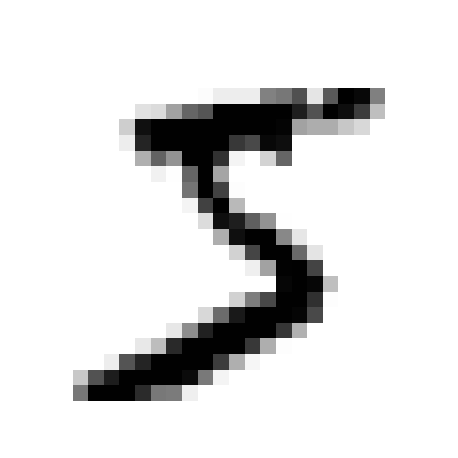

'5'

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

y[0]

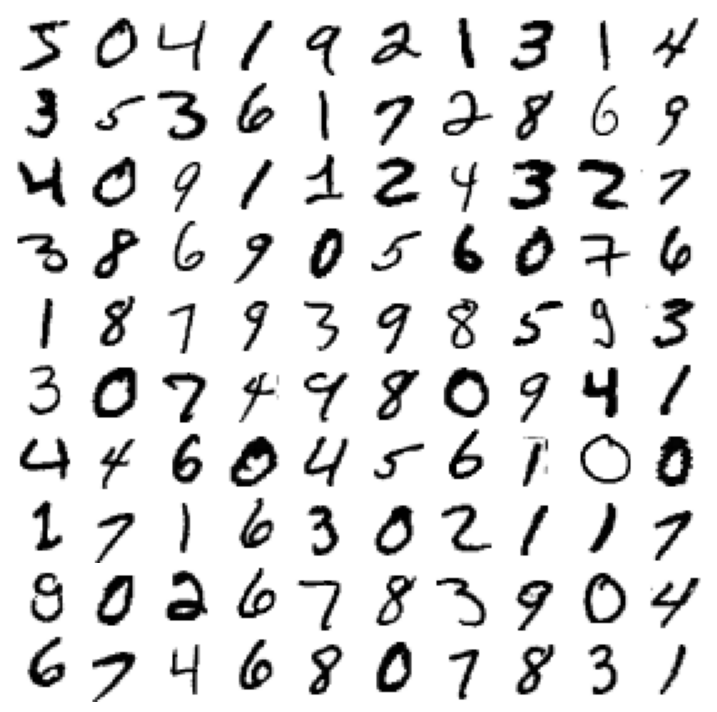

In [ ]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

Splitting : train - test

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training a Binary Classifier

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 =(y_test=='5')


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

print(sgd_clf.predict([some_digit]))

[ True]


Measuring Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_test)))

cross_val_score(dummy_clf,X_train,y_train_5,cv=5,scoring="accuracy")


False


array([0.90958333, 0.90966667, 0.90966667, 0.90966667, 0.90966667])

Confusion Matrices

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score , recall_score, f1_score

print("Precision: ",precision_score(y_train_5,y_train_pred))

print("Recall: ",recall_score(y_train_5,y_train_pred))

print("F1 score : ", f1_score(y_train_5,y_train_pred))

Precision:  0.8370879772350012
Recall:  0.6511713705958311
F1 score :  0.7325171197343847


In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 3000
y_some_digit_pred = ( y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]
[False]


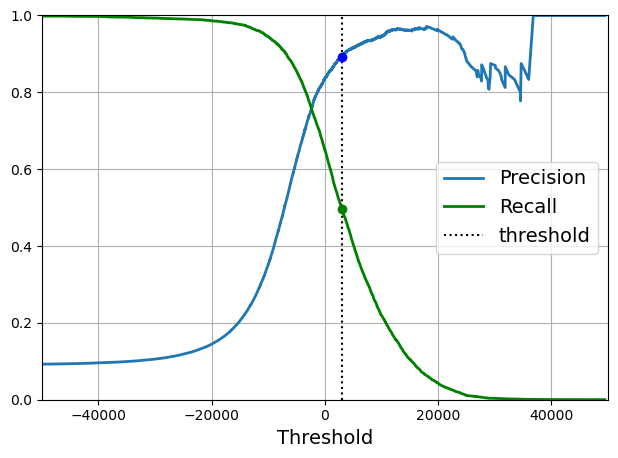

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                             method = "decision_function")

from sklearn.metrics import precision_recall_curve

precisions , recalls , thresholds = precision_recall_curve(y_train_5,y_scores)

plt.plot(thresholds, precisions[:-1],label="Precision",linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

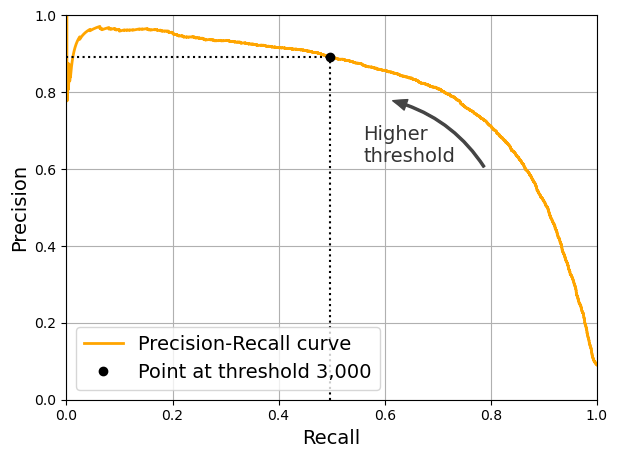

In [ ]:
import matplotlib.patches as patches

plt.plot(recalls, precisions, color='orange', linewidth=2, label='Precision-Recall curve')
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

Multiclass Classification

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state= 42 )
svm_clf.fit(X_train[:2000],y_train[:2000])

svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_score = svm_clf.decision_function([some_digit])
print(some_digit_score.round(2))
print(svm_clf.classes_)


[[ 3.79  0.73  6.06  8.3  -0.29  9.3   1.75  2.77  7.21  4.82]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf =OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

print(ovr_clf.predict([some_digit]))

print(len(ovr_clf.estimators_))

['5']
10


Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))


y_train_pred = cross_val_predict(sgd_clf , X_train_scaled, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()
'''


Multilabel Classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >='7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel= np.c_[y_train_large, y_train_odd]

print(y_multilabel)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

[[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]


array([[False,  True]])

Multioutput Classification

In [ ]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

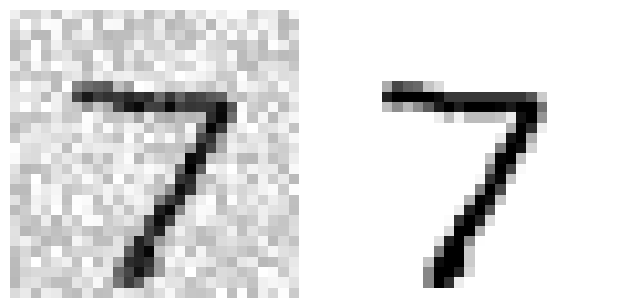

In [ ]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

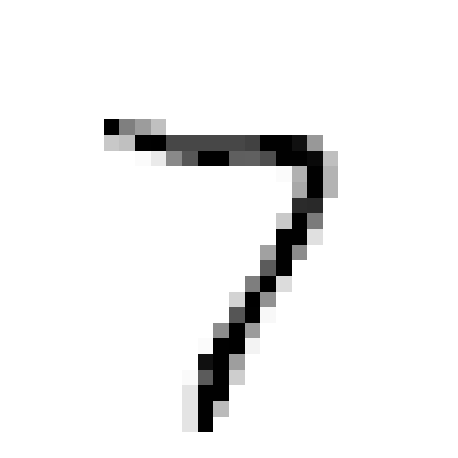

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()